In [1]:
m = 3.0
l = 1.0
A = l + m * ((8.0 * (l ** 2) + m ** 2) ** 0.5 - m) / (2.0 * l)

lhalf = l / 2
Ahalf = A / 2

H = (m ** 2 - (Ahalf - lhalf) ** 2) ** 0.5
h = l * H / (A - l)
tH = h + H

origin = [0.0, 0.0, 0.0]

c_lsqr = [0.0, 0.0, h]
l1 = [lhalf, lhalf, h]
l2 = [-lhalf, lhalf, h]
l3 = [-lhalf, -lhalf, h]
l4 = [lhalf, -lhalf, h]

c_Asqr = [0.0, 0.0, tH]
A1 = [Ahalf, Ahalf, tH]
A2 = [-Ahalf, Ahalf, tH]
A3 = [-Ahalf, -Ahalf, tH]
A4 = [Ahalf, -Ahalf, tH]

In [2]:
def unit_vec(vec):
    mag = 0.0
    u_vec = []
    
    for i in vec:
        mag += i ** 2
    
    if (mag == 0.0):
        return []
    else:
        s = mag ** 0.5
        
        for i in range(len(vec)):
            u_vec.append(vec[i] / s)
      
        return u_vec

def cross_prod(a, b):
    return [a[1] * b[2] - a[2] * b[1], a[2] * b[0] - a[0] * b[2], a[0] * b[1] - a[1] * b[0]]

def normal_vec(a, b):
    return unit_vec(cross_prod(a, b))

In [3]:
n12 = normal_vec(A1, A2)
n23 = normal_vec(A2, A3)
n34 = normal_vec(A3, A4)
n41 = normal_vec(A4, A1)

In [4]:
# intersection of a line with one of the four side planes
def intrsct1(pln, ln_pt, ln_prmtr):
    if (len(ln_pt) == 0):
        return []
    
    den = pln[0] * ln_prmtr[0] + pln[1] * ln_prmtr[1] + pln[2] * ln_prmtr[2]
    
    if (den != 0.0):
        t = - (pln[0] * ln_pt[0] + pln[1] * ln_pt[1] + pln[2] * ln_pt[2]) / den
        point = []

        for i in range(3):
            point.append(ln_pt[i] + ln_prmtr[i] * t)

        return point
    else:
        return []

# intersection of a line with the top or bottom parallel faces
def intrsct2(k, ln_pt, ln_prmtr):
    if (len(ln_pt) == 0):
        return []
    
    if (ln_prmtr[2] != 0.0):
        t = (k - ln_pt[2]) / ln_prmtr[2]
        point = []

        for i in range(2):
            point.append(ln_pt[i] + ln_prmtr[i] * t)
        
        point.append(k)

        return point
    else:
        return []

In [5]:
def intr_lface(ln_pt, ln_prmtr):
    l_pt = intrsct2(h, ln_pt, ln_prmtr)
    
    if (len(l_pt) == 0):
        return False
    
    if (abs(l_pt[0]) <= lhalf and abs(l_pt[1]) <= lhalf):
        return True
    else:
        return False

def intr_Aface(ln_pt, ln_prmtr):
    A_pt = intrsct2(h + tH, ln_pt, ln_prmtr)
    
    if (len(A_pt) == 0):
        return False

    if (abs(A_pt[0]) <= Ahalf and abs(A_pt[1]) <= Ahalf):
        return True
    else:
        return False

def intr12(ln_pt, ln_prmtr):
    pt12 = intrsct1(n12, ln_pt, ln_prmtr)
    
    if (len(pt12) == 0):
        return False
    
    x = pt12[0]
    y = pt12[1]
    
    if (y > 0 and abs(x) < abs(y) and lhalf < abs(y) and Ahalf >= abs(y)):
        return True
    else:
        return False

def intr23(ln_pt, ln_prmtr):
    pt23 = intrsct1(n23, ln_pt, ln_prmtr)
    
    if (len(pt23) == 0):
        return False
    
    x = pt23[0]
    y = pt23[1]   
    
    if (x < 0 and abs(x) > abs(y) and lhalf < abs(x) and Ahalf >= abs(x)):
        return True
    else:
        return False

def intr34(ln_pt, ln_prmtr):
    pt34 = intrsct1(n34, ln_pt, ln_prmtr)
    
    if (len(pt34) == 0):
        return False
    
    x = pt34[0]
    y = pt34[1]
    
    if (y < 0 and abs(x) < abs(y) and lhalf < abs(y) and Ahalf >= abs(y)):
        return True
    else:
        return False

def intr41(ln_pt, ln_prmtr):
    pt41 = intrsct1(n41, ln_pt, ln_prmtr)
    
    if (len(pt41) == 0):
        return False
    
    x = pt41[0]
    y = pt41[1]
    
    if (x > 0 and abs(x) > abs(y) and lhalf < abs(x) and Ahalf >= abs(x)):
        return True
    else:
        return False

# checks which face of the solar oven a particular line intersects
# 0 - bottom square or top square
# number varies - side face

def oven_intrsct(ln_pt, ln_prmtr):
    plns = []
    
    if (intr_lface(ln_pt, ln_prmtr)):
        return plns
    
    if (intr12(ln_pt, ln_prmtr)):
        plns.append(12)
    
    if (intr23(ln_pt, ln_prmtr)):
        plns.append(23)
    
    if (intr34(ln_pt, ln_prmtr)):
        plns.append(34)
    
    if (intr41(ln_pt, ln_prmtr)):
        plns.append(41)
    
    return plns

In [6]:
def dot_prod(a, b):
    dp = 0.0
    
    for i in range(len(a)):
        dp += a[i] * b[i]
    
    return dp

def projection(ln_prmtr, n_vec):
    dp = dot_prod(ln_prmtr, n_vec)
    proj = []
    
    for i in range(len(n_vec)):
        proj.append(n_vec[i] * dp)
    
    return proj

In [7]:
def oven_reflection(ln_pt):
    ln_prmtr = [0.0, 0.0, 1.0]
    bounces = 0
    prev_intr = -1
    counter = 0
    points = []
    
    ln_pt.append(0.0)
    
    while (counter < 100):
        intr = oven_intrsct(ln_pt, ln_prmtr)
        points.append(ln_pt)
        
        if (len(intr) == 0 or (len(intr) == 1 and intr[0] == prev_intr)):
            temp = intrsct2(h, ln_pt, ln_prmtr)
            
            if (abs(temp[0]) <= lhalf and abs(temp[1]) <= lhalf):
                points.append(temp)
                return bounces, points, True
            else:
                points.append(intrsct2(tH, ln_pt, ln_prmtr))
                return bounces, points, False
        elif ((12 in intr) and prev_intr != 12):
            bounces += 1
            proj = projection(ln_prmtr, n12)
            ln_pt = intrsct1(n12, ln_pt, ln_prmtr)
            
            for i in range(len(ln_prmtr)):
                ln_prmtr[i] = 2 * proj[i] - ln_prmtr[i]
            
            prev_intr = 12
            
        elif ((23 in intr) and prev_intr != 23):
            bounces += 1
            proj = projection(ln_prmtr, n23)
            ln_pt = intrsct1(n23, ln_pt, ln_prmtr)
            
            for i in range(len(ln_prmtr)):
                ln_prmtr[i] = 2 * proj[i] - ln_prmtr[i]
            
            prev_intr = 23
            
        elif ((34 in intr) and prev_intr != 34):
            bounces += 1
            proj = projection(ln_prmtr, n34)
            ln_pt = intrsct1(n34, ln_pt, ln_prmtr)
            
            for i in range(len(ln_prmtr)):
                ln_prmtr[i] = 2 * proj[i] - ln_prmtr[i]
            
            prev_intr = 34
            
        elif ((41 in intr) and prev_intr != 41):
            bounces += 1
            proj = projection(ln_prmtr, n41)
            ln_pt = intrsct1(n41, ln_pt, ln_prmtr)
            
            for i in range(len(ln_prmtr)):
                ln_prmtr[i] = 2 * proj[i] - ln_prmtr[i]
            
            prev_intr = 41
        
        counter += 1
    
    return bounces, points, False

In [8]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.colors

In [9]:
def reflection_map(ln_pt):
    bounces, points, hit_lwindow = oven_reflection(ln_pt)
    
    if (hit_lwindow):
        print("hit window")
    else:
        print("did NOT hit window")
    
    print(str(bounces) + " bounces")

    x = []
    y = []
    z = []

    for i in range(len(points)):
        x.append(points[i][0])
        y.append(points[i][1])
        z.append(points[i][2])

    Ax = [Ahalf, -Ahalf, -Ahalf, Ahalf, Ahalf]
    Ay = [Ahalf, Ahalf, -Ahalf, -Ahalf, Ahalf]

    lx = [lhalf, -lhalf, -lhalf, lhalf, lhalf]
    ly = [lhalf, lhalf, -lhalf, -lhalf, lhalf]

    tx = [lhalf, Ahalf, -Ahalf, -lhalf, -lhalf, -Ahalf, Ahalf, lhalf, lhalf]
    ty = [lhalf, Ahalf, Ahalf, lhalf, -lhalf, -Ahalf, -Ahalf, -lhalf, lhalf]
    
    figure(figsize=(8, 6), dpi=80)

    plt.plot(Ax, Ay, c = "gray")
    plt.plot(tx, ty, c = "gray")
    plt.plot(lx, ly, c = "gray")

    plt.plot(x, y, c = "blue", marker = "o", markersize = 5)
    plt.show()

hit window
1 bounces


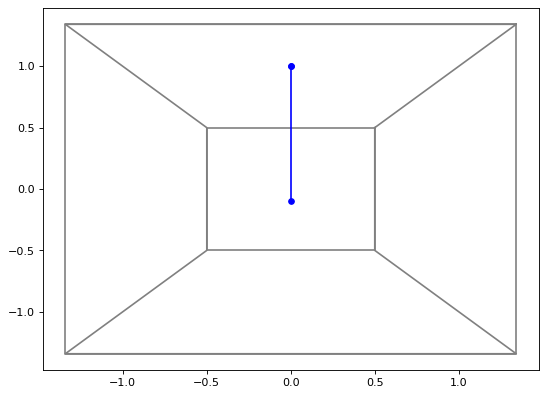

In [10]:
reflection_map([0.0, 1.0])

hit window
2 bounces


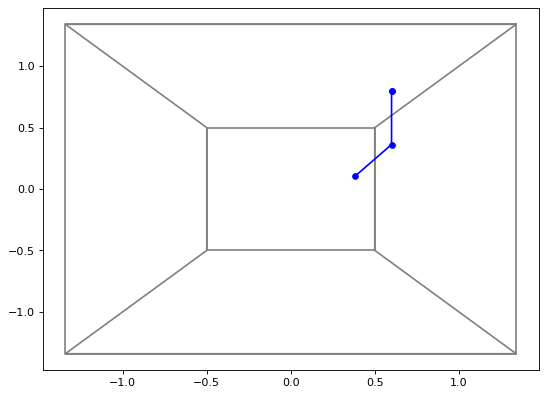

In [11]:
reflection_map([0.6, 0.8])

hit window
2 bounces


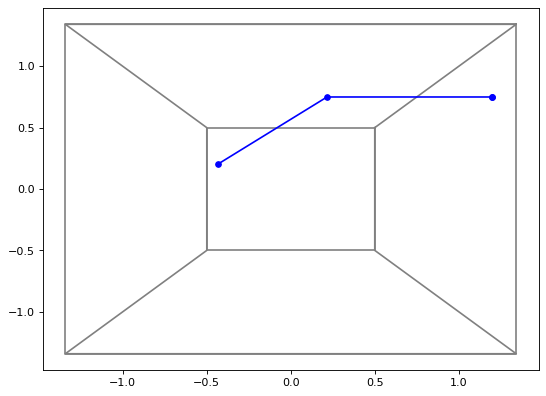

In [12]:
reflection_map([1.2, 0.75])

hit window
3 bounces


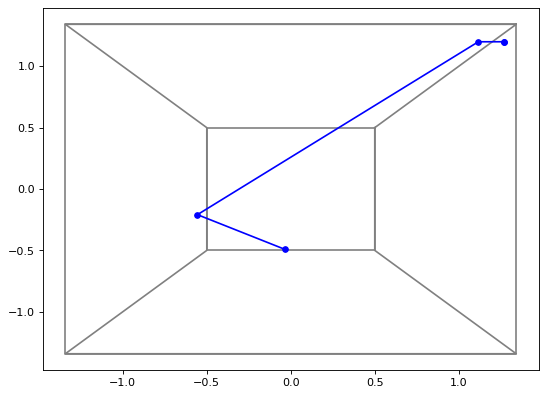

In [13]:
reflection_map([1.27, 1.2])

In [14]:
def solar_oven_map(step_size=0.01):
    min_val = -Ahalf
    max_val = Ahalf

    n = int((max_val - min_val) / step_size)

    px = []
    py = []
    bs = []

    for i in range(n+2):
        x = min_val + step_size * i
        x = round(x, 3)
        for j in range(n+2):
            y = min_val + step_size * j
            y = round(y, 3)

            if (abs(x) == abs(y) and abs(x) > 0.5):
                continue

            bounce, points, hit_lwindow = oven_reflection([x, y])
            px.append(x)
            py.append(y)
            bs.append(bounce)

    Ax = [Ahalf, -Ahalf, -Ahalf, Ahalf, Ahalf]
    Ay = [Ahalf, Ahalf, -Ahalf, -Ahalf, Ahalf]

    lx = [lhalf, -lhalf, -lhalf, lhalf, lhalf]
    ly = [lhalf, lhalf, -lhalf, -lhalf, lhalf]

    tx = [lhalf, Ahalf, -Ahalf, -lhalf, -lhalf, -Ahalf, Ahalf, lhalf, lhalf]
    ty = [lhalf, Ahalf, Ahalf, lhalf, -lhalf, -Ahalf, -Ahalf, -lhalf, lhalf]

    figure(figsize=(8, 6), dpi=80)

    plt.plot(Ax, Ay, c = "gray")
    plt.plot(tx, ty, c = "gray")
    plt.plot(lx, ly, c = "gray")

    cmap = plt.cm.viridis_r
    norm = matplotlib.colors.Normalize(vmin=0, vmax=8)

    plt.xlim(-Ahalf, Ahalf)
    plt.ylim(-Ahalf, Ahalf)
    plt.scatter(px, py, c=bs, cmap=cmap, norm=norm, s = 1, marker = "o")

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    plt.colorbar(sm)

    plt.show()

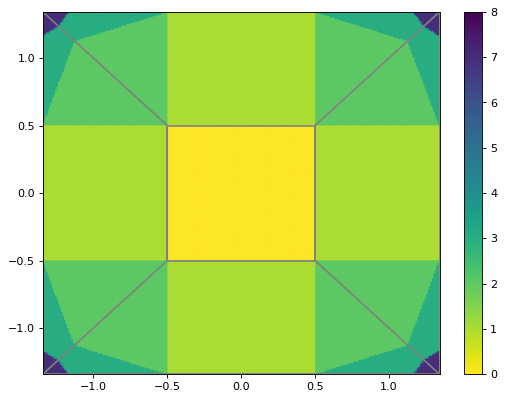

In [15]:
# different colors represent different number of bounces when light is shined at the solar oven
solar_oven_map()